In [1]:
import logging
import os

import cabinetry

set up log formatting and suppress verbose output from matplotlib


In [2]:
logging.basicConfig(
    level=logging.INFO, format="%(levelname)s - %(name)s - %(message)s"
)
logging.getLogger("matplotlib").setLevel(logging.WARNING)

import example config file

In [3]:
cabinetry_config = cabinetry.configuration.read("config_example.yml")
cabinetry.configuration.print_overview(cabinetry_config)

INFO - cabinetry.configuration - opening config file config_example.yml
INFO - cabinetry.configuration - the config contains:
INFO - cabinetry.configuration -   3 Sample(s)
INFO - cabinetry.configuration -   1 Regions(s)
INFO - cabinetry.configuration -   1 NormFactor(s)
INFO - cabinetry.configuration -   3 Systematic(s)


create template histograms

In [4]:
histo_folder = "histograms/"
cabinetry.template_builder.create_histograms(
    cabinetry_config, histo_folder, method="uproot"
)

WARNING - cabinetry.histo - Signal_region_Signal_nominal has empty bins: [0]


perform histogram post-processing

In [5]:
cabinetry.template_postprocessor.run(cabinetry_config, histo_folder)

WARNING - cabinetry.histo - Signal_region_Signal_nominal has empty bins: [0]


build a workspace and save to file

In [6]:
workspace_path = "workspaces/example_workspace.json"
ws = cabinetry.workspace.build(cabinetry_config, histo_folder)
cabinetry.workspace.save(ws, workspace_path)

INFO - cabinetry.workspace - building workspace
WARNING - cabinetry.workspace - fixed parameters are not yet propagated through pyhf to fits
INFO - pyhf.workspace - Validating spec against schema: workspace.json


run a fit

In [7]:
ws = cabinetry.workspace.load(workspace_path)
bestfit, uncertainty, labels, _, corr_mat = cabinetry.fit.fit(ws)

INFO - cabinetry.fit - performing unconstrained fit
INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier staterror_Signal_region (4 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Luminosity (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Modeling (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier WeightBasedModeling (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Signal_norm (1 new nuisance parameters)
INFO - cabinetry.fit - staterror_Signal_region[bin_0]: 1.001249 +/- 0.041128
INFO - cabinetry.fit - staterror_Signal_region[bin_1]: 0.989030 +/- 0.038068
INFO - cabinetry.fit - staterror_Signal_region[bin_2]: 1.019662 +/- 0.036508
INFO - cabinetry.fit - staterror_Signal_region[bin_3]: 0.983094 +/- 0.042498
INFO - cabinetry.fit - Luminosity                    : -0.085397 +/- 0.987245
INFO - cabinetry.fit - Modeling             

------------------------------------------------------------------
| FCN = 17.2                    |     Ncalls=325 (325 total)     |
| EDM = 6.51e-06 (Goal: 0.0002) |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------


visualize pulls and correlation matrix

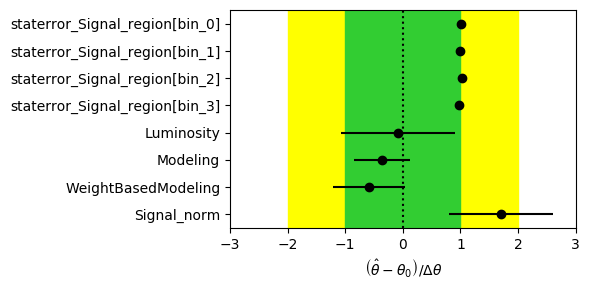

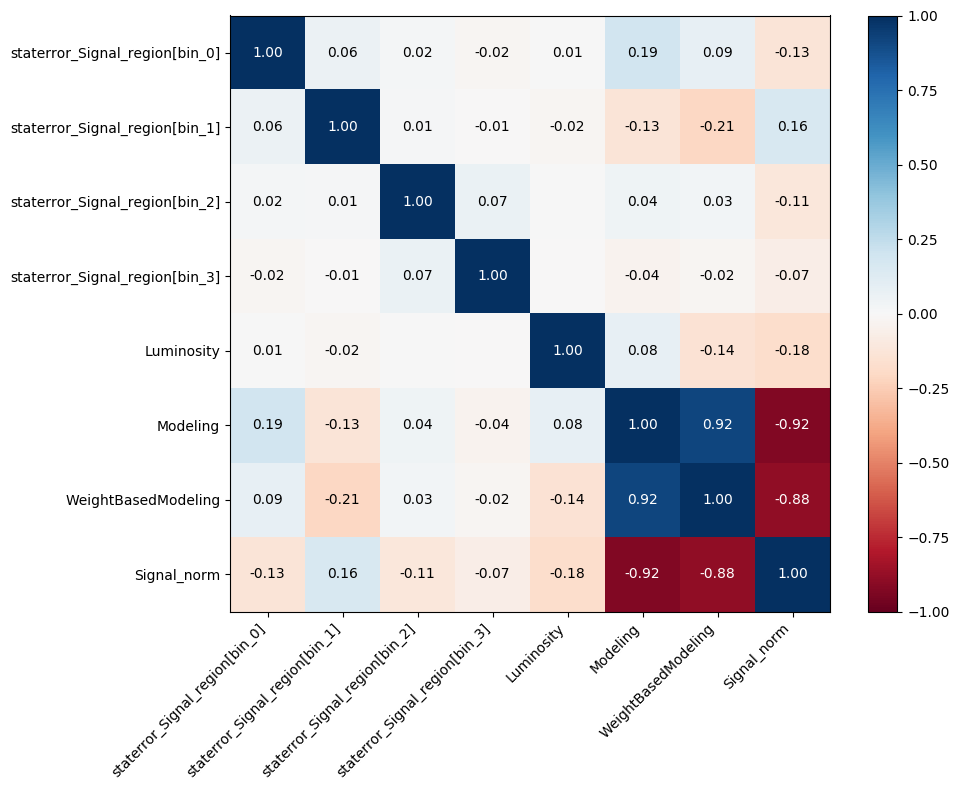

In [8]:
figure_folder = "figures/"
cabinetry.visualize.pulls(bestfit, uncertainty, labels, "figures/")
cabinetry.visualize.correlation_matrix(corr_mat, labels, "figures/")

visualize templates and data

INFO - cabinetry.visualize - visualizing histogram


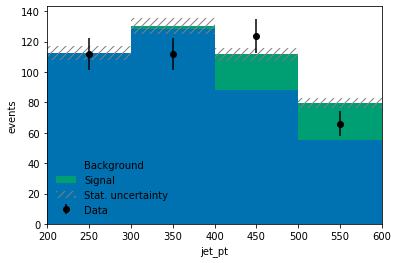

In [9]:
cabinetry.visualize.data_MC(
    cabinetry_config, histo_folder, figure_folder, prefit=True, method="matplotlib"
)